In [3]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

# DATA PROCESSING

In [4]:
data = pd.read_csv('BHP.csv')

In [5]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
feature = 'location'

In [7]:
data[feature].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [8]:
location = data[feature].value_counts().index[0]

In [9]:
data_location = data[(data[feature]==location) & (data['area_type']=='Super built-up  Area')]

In [10]:
data_location.dropna(inplace=True)

<ipython-input-10-94f5e244d894>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location.dropna(inplace=True)


In [11]:
data_location.shape

(319, 9)

In [12]:
row = data_location.shape[0]

In [13]:
data_location = data_location[['total_sqft','price']]
data_location['total_sqft'] = pd.to_numeric(data_location['total_sqft'], errors='coerce')
data_location['price'] = pd.to_numeric(data_location['price'], errors='coerce')
data_location['total_sqft'] = data_location['total_sqft']/1000

In [14]:
train = data_location.head(int(row*0.7))
test  = data_location.tail(int(row*0.3))

In [15]:
train.head()

,total_sqft,price
5,1.170,38.00
47,1.459,94.82
112,1.116,51.91
317,1.280,75.00
335,1.173,58.00


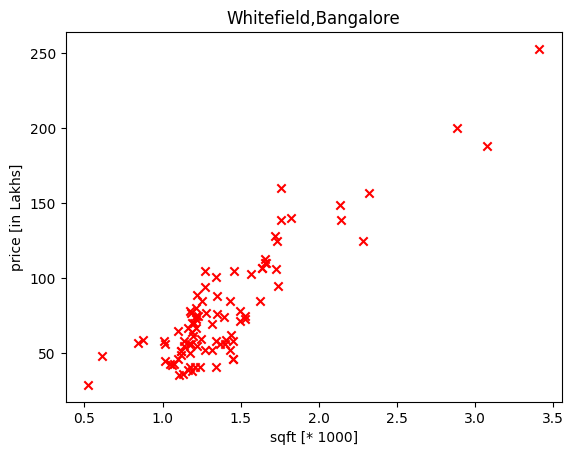

In [16]:
plt.xlabel('sqft [* 1000]')
plt.ylabel('price [in Lakhs]')
plt.title(f'{location},Bangalore')
plt.scatter(test['total_sqft'],test['price'],marker = 'x',color = 'red')

In [17]:
x2 = train['total_sqft'].values
y2 = train['price'].values
x3 = test['total_sqft'].values
y3 = test['price'].values

In [18]:
x = []
y = []
print(f'x-len:{len(x)}')
print(f'y-len:{len(y)}')
for i in range (0,len(x2)):
  if(isinstance(x2[i], (int, float)) and not np.isnan(x2[i])):
    x.append(x2[i])
    y.append(y2[i])
  else:
    print(x2[i])

x-len:0
y-len:0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [19]:
x_test = []
y_test = []
for i in range (0,len(x3)):
  if(isinstance(x3[i], (int, float)) and not np.isnan(x3[i])):
    x_test.append(x3[i])
    y_test.append(y3[i])
  else:
    print(x3[i])

nan
nan
nan
nan
nan


In [20]:
len(x)

213

# ALGORITHM FORMATION

**SIMPLE LINEAR REGRESSION MODEL** $$Y^{(i)}= wx^{(i)}+b$$

**computing output function**: $$f_{w,b} = wx^{(i)}+b$$ which will provide linear agression model to predict price wrt sqft.

In [21]:
f_wb = []
def compute_output(w,b,x,y) :
  m = len(x)
  for i in range(0,m):
    f_wb.append((w*x[i])+b)

**COST FUNCTION:** $$J_{w,b} = \frac{1}{2m}\sum\limits_{i=0}^{m} (wx^{(i)}+b-y^{(i)})^2$$ which help us in determining the parameters $$(w,b)$$ where **j_wb** will be mininmum according to the parameters

In [22]:
def compute_cost(w,b,x,y):
  j_wb = 0
  m = len(x)
  for i in range(0,m):
    j_wb += ((w*x[i])+ b - y[i])**2
    # print(train['total_sqft'].values[i])
  j_wb = (1/(2*m))*j_wb
  return j_wb

**GRADIENT DESCENT**
$$\frac{dj_{(w,b)}}{dw} = \frac{1}{m}\sum\limits_{i=0}^{m}[wx^{(i)}+b-y{(i)}].wx^{(i)}$$
$$\frac{dj_{(w,b)}}{db} = \frac{1}{m}\sum\limits_{i=0}^{m}wx^{(i)}+b-y{(i)}$$
Here we finding the value of parameters $$(w,b)$$ for which cost_function would be minimum , by finding where the slope of cost _function would be minimum.

In [23]:
def compute_gradient(w,b,x,y):
  m = len(x)
  dj_dw = 0
  dj_db = 0
  for i in range(0,m):
   dj_dw += ((w*x[i])+b-y[i])*x[i]
   dj_db += (w*x[i])+b-y[i]
  dj_dw *= (1/m)
  dj_db *= (1/m)
  return(dj_dw,dj_db)


**IMPROVENT OF GRADIENT DESCENT ON EACH ITERATION**
$$w = w - \alpha\frac{dj_{(w,b)}}{dw}$$
$$b = b - \alpha\frac{dj_{(w,b)}}{db}$$
The cases on how w & b will change:<br>
$$ \frac{dj_{(w,b)}}{dw} > 0$$
Here, the slope will be positive and 'w' will move towards left to achive minimum.
$$ \frac{dj_{(w,b)}}{dw} < 0$$
Here, the slope will be negative and 'w' will move towards right to achive minimum.
$$ \frac{dj_{(w,b)}}{dw} = 0$$
Very rarely we will get it '0' at early, after many iterations and changing of parametrical values, we will come to a point where it will reach minimum at that time we will be getting our 'w' and 'b' <br><br>
$$Note: \alpha - controls-speed-always-positive $$  

In [24]:
def gradient_descent(w,b,x,y,alpha,repeat,compute_gradient,compute_cost):
  j_hist = []
  w_hist = []
  b_hist = []
  dj_wb  = []
  plot_hist = []
  for i in range(0,repeat):
    dj_dw,dj_db = compute_gradient(w,b,x,y)
    w = w - (alpha*dj_dw)
    b = b - (alpha*dj_db)
    if(i<=repeat):
      j_hist.append(compute_cost(w,b,x,y))
      w_hist.append(w)
      b_hist.append(b)
      dj_wb.append((dj_dw+dj_db)/2)
      plot_hist.append([w,b])
    if((i%100)==0):
      print(f'iteration[{i+1}]: w:{w}, b:{b}, j:{j_hist[i]} dj_db:{dj_db} dj_dw:{dj_dw}')
  return(w,b,j_hist,w_hist,b_hist,dj_wb,plot_hist)

In [25]:
w_temp = 0
b_temp = 0
alpha_temp = 0.01 #1.0e-2
repeat = 10000
w,b,j_hist,w_hist,b_hist,dj_wb,plot_hist = gradient_descent(w_temp,b_temp,x,y,alpha_temp,repeat,compute_gradient,compute_cost)

iteration[1]: w:1.7180728577464788, b:0.9019657276995307, j:6527.460107876276 dj_db:-90.19657276995306 dj_dw:-171.80728577464788
iteration[101]: w:50.06928444671422, b:19.244556785023633, j:1562.0281107385752 dj_db:4.454750508517487 dj_dw:-8.546817403831774
iteration[201]: w:55.13240635269533, b:13.275993836173814, j:1499.1411204804801 dj_db:6.209127648450503 dj_dw:-3.8003913551454698
iteration[301]: w:58.64056238036734, b:7.368178144638553, j:1451.9055349316684 dj_db:5.592260703513268 dj_dw:-3.285914869514825
iteration[401]: w:61.74029266897943, b:2.0879904507464753, j:1414.3969490550878 dj_db:4.984997914037796 dj_dw:-2.925521845318372
iteration[501]: w:64.5018592863537, b:-2.6177594950654313, j:1384.610833167104 dj_db:4.442327877049262 dj_dw:-2.606953311823613
iteration[601]: w:66.96275872526297, b:-6.811210465057038, j:1360.9572424482888 dj_db:3.9586976235803393 dj_dw:-2.3231353244751074
iteration[701]: w:69.15574226658048, b:-10.548125334841894, j:1342.1735797505758 dj_db:3.5277186

# **PLOTING DATA**

In [26]:
compute_output(w,b,x,y)

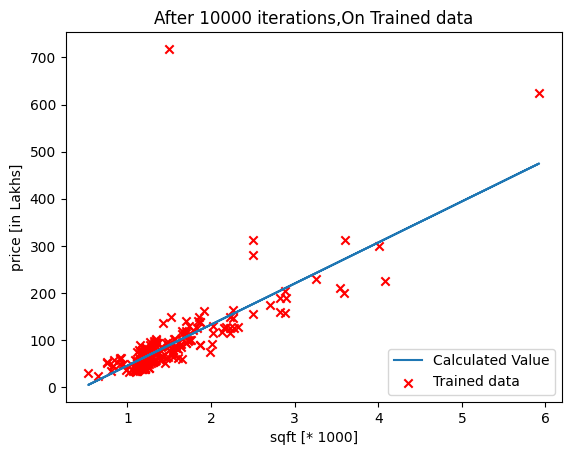

In [27]:
plt.xlabel('sqft [* 1000]')
plt.ylabel('price [in Lakhs]')
plt.title(f'After {repeat} iterations,On Trained data')

plt.plot(x,f_wb)
plt.scatter(x,y,marker='x',color='red')
plt.legend(["Calculated Value","Trained data"], loc="lower right")

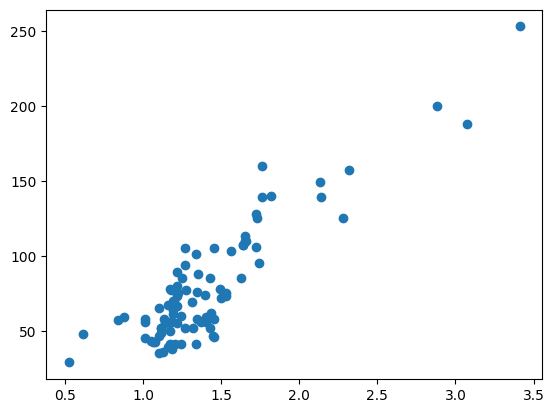

In [28]:
plt.scatter(x_test,y_test)

In [29]:
check_y = []
def check(w,b,x):
  m = len(x)
  for i in range (0,m):
    check_y.append((w*x[i]+b))
  return check_y

In [30]:
predict_y = check(w,b,x_test)

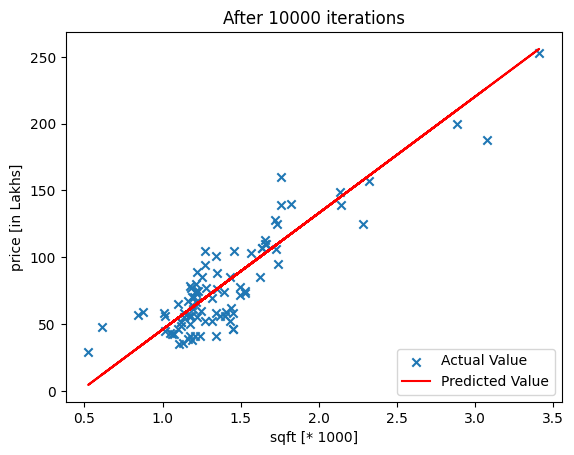

In [31]:
plt.xlabel('sqft [* 1000]')
plt.ylabel('price [in Lakhs]')

plt.title(f'After {repeat} iterations')
plt.scatter(x_test,y_test,marker='x')
plt.plot(x_test,predict_y,color='red')
plt.legend(["Actual Value", "Predicted Value"], loc="lower right")


In [32]:
x_plot,y_plot = np.meshgrid(w_hist,b_hist)

In [33]:
z_plot = []
for i in range(0,len(x_plot)):
  z_plot.append(compute_cost(x_plot[i],y_plot[i],x,y))

In [34]:
z_plot = np.array(z_plot)

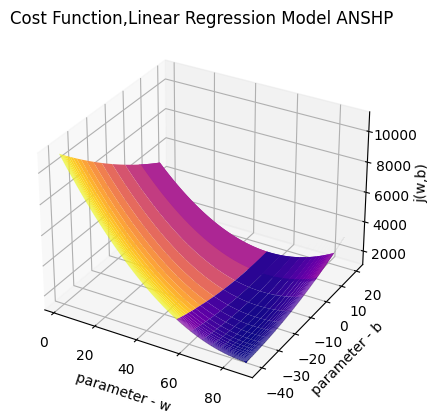

In [35]:
ax = plt.axes(projection="3d")
ax.set_title('Cost Function,Linear Regression Model ANSHP')
ax.set_xlabel('parameter - w')
ax.set_ylabel('parameter - b')
ax.set_zlabel('j(w,b)')

ax.plot_surface(x_plot,y_plot,z_plot,cmap='plasma')

In [36]:
itern = np.arange(0,10000)

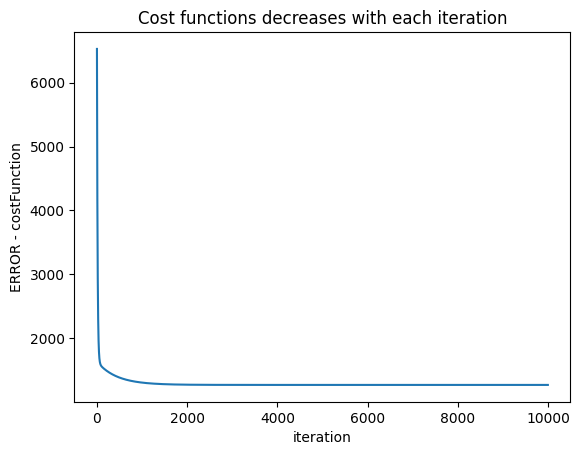

In [37]:
plt.xlabel('iteration')
plt.ylabel('ERROR - costFunction')
plt.title('Cost functions decreases with each iteration')
plt.plot(itern,j_hist)

In [39]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
